![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Evaluation of Classifiers

(using hold-out, cross-validation, etc.)






# Libraries

In [ ]:
import numpy as np
from   sklearn.svm import SVC
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import confusion_matrix, accuracy_score
from   sklearn.model_selection import cross_val_score
from   sklearn.model_selection import StratifiedKFold,KFold,LeaveOneOut


## Database loading

In these examples, we will use the following feature databases to test classifiers:


* F2: Training data: 800 samples with 2 features. Testing data: 400 samples with 2 features. Classes: 0...1

* G2: Training data: 800 samples with 2 features.
 Testing data: 200 samples with 2 features. Classes: 1...2

* G3: Training data: 1200 samples with 2 features. Testing data: 600 samples with 2 features. Classes: 1...3

* G3x4: Training data: 3600 samples with 4 features. Testing data: 900 samples with 4 features. Classes: 1...3

* G4: Training data: 800 samples with 2 features .Testing data: 400 samples with 2 features. Classes: 1...4

* P2: Training data: 1052 samples with 2 features. Testing data: 262 samples with 2 features. Classes: 0...1

In [ ]:
!wget https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
!unzip -qq F2

!wget https://www.dropbox.com/s/bqfrgjvijpn6rrg/G2.zip
!unzip -qq G2

!wget https://www.dropbox.com/s/eg2wx2ari93n8y7/G3.zip
!unzip -qq G3

!wget https://www.dropbox.com/s/zz51gdrltuoy2fo/G4.zip
!unzip -qq G4

!wget https://www.dropbox.com/s/a0egs8asnwdda4o/P2.zip
!unzip -qq P2

!wget https://www.dropbox.com/s/llymxic1dose83d/F40.zip
!unzip -qq F40

!wget https://www.dropbox.com/s/3w2rgwonp36ee3j/G3x4.zip
!unzip -qq G3x4


--2023-06-05 17:35:11--  https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3w6k7vu3xpesjxh/F2.zip [following]
--2023-06-05 17:35:12--  https://www.dropbox.com/s/raw/3w6k7vu3xpesjxh/F2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f9fff54861ec44d9d4240305b.dl.dropboxusercontent.com/cd/0/inline/B9Yd4QIVbQlRLW6y2QE0qsDDamzH1JNZ_-KqTBwS8fUNG62zfy9FQLFzsPJTxWAeg3fQwJzDrgveNeYcLR8PoPL90ehsitchDf19vE4AMSimnV4fLht7svokvz2I-ON7yc18X8CdsRFqgjFLBjszSlFDzCh1imnEWmt0CaaNKbdIAw/file# [following]
--2023-06-05 17:35:12--  https://uc2f9fff54861ec44d9d4240305b.dl.dropboxusercontent.com/cd/0/inline/B9Yd4QIVbQlRLW6y2QE0qsDDamzH1JNZ_-KqTBwS8fUNG62zfy9FQLFzsPJTxWAeg3fQwJzDrgveNeYcLR8PoPL90ehsitchDf

## Functions

In [ ]:
def load_features(prefix,merge=0):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')             # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))   # testing labels
    if merge==0:
      print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
      print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
      print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
      return Xtrain,ytrain,Xtest,ytest
    else:
      X = np.concatenate((Xtrain,Xtest),axis=0)
      y = np.concatenate((ytrain,ytest),axis=0)
      print('   Whole data: '+str(X.shape[0]) +' samples with '+str(X.shape[1]) +' features')
      print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
      return X,y

# Training/Testing Data

In [ ]:
data = 'G3x4' # <= puede ser 'G2','G3','G4','P2','F2' (ver explicación más arriba)
print('Loading '+data+'...')
X,y   = load_features(data + '/' + data,merge=1)   # load whole data

Cargando G3x4...
   Whole data: 4500 samples with 4 features
      Classes: 1...3


           x_0       x_1       x_2       x_3  clases
0     1.278433 -0.689998  0.947501 -0.528813     1.0
1     1.217223 -1.098643  1.061521 -0.517122     1.0
2     0.811685 -0.497013  0.605744  0.363438     1.0
3     0.266625  0.117383  0.490073  0.625220     1.0
4     0.557257 -0.635766  0.805885 -0.535321     1.0
...        ...       ...       ...       ...     ...
4495  0.600787  0.400442 -0.222601  0.345612     3.0
4496  1.409913  0.414913  0.309939  1.188627     3.0
4497  0.667786 -0.185863 -0.237184  1.039033     3.0
4498  0.231914  0.167424 -0.302872  0.359629     3.0
4499  1.143884 -0.802325 -0.659553 -0.210865     3.0

[4500 rows x 5 columns]


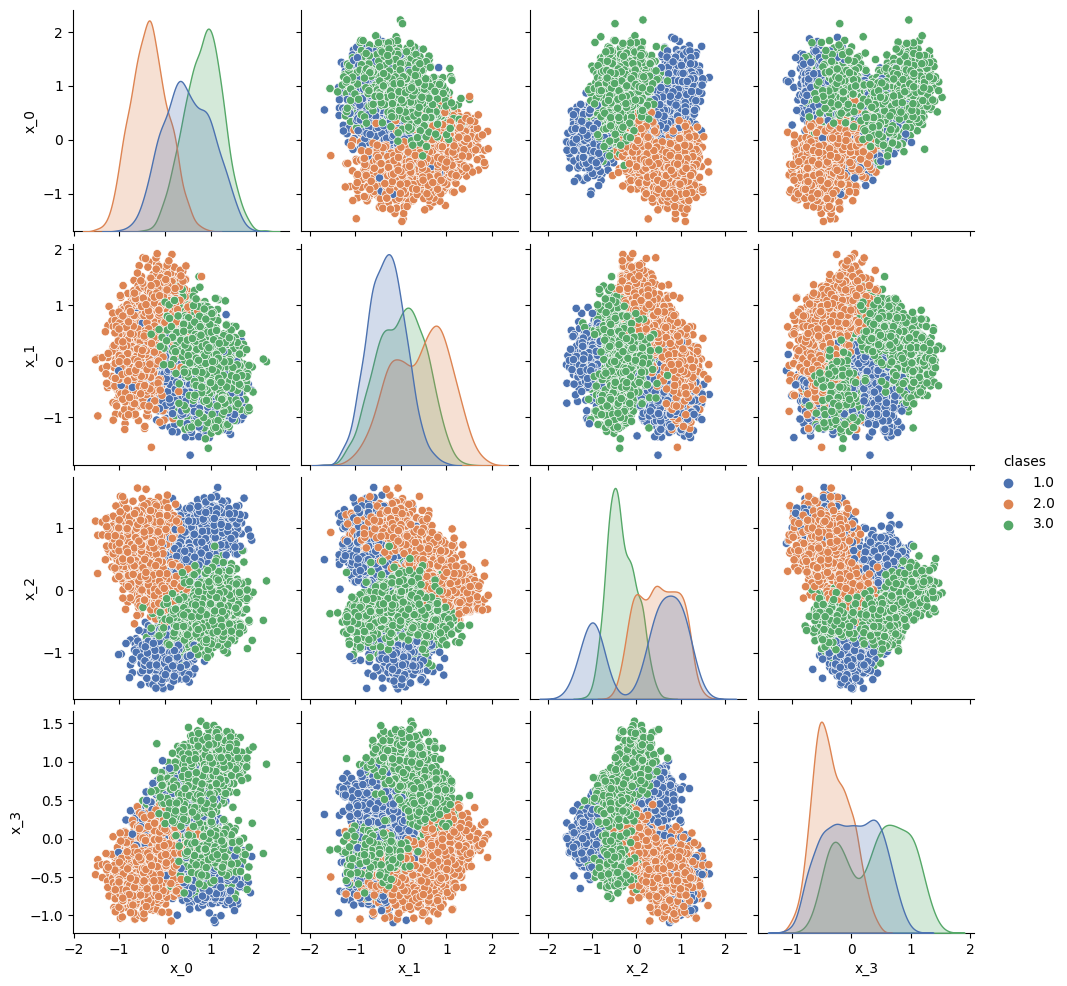

In [ ]:
# Visualization for G3x4

import pandas as pd
import seaborn as sns
df1 = pd.DataFrame(X, columns = ['x_0','x_1','x_2','x_3'])
df2 = pd.DataFrame(y,columns = ['clases'])
df = pd.concat([df1, df2], axis=1)
print(df)

sns.pairplot(df,hue='clases',palette="deep")

# Hold-Out

Reference: [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# 1. Spliting of Training and Testing
t = 0.9 # data ratio for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=t, stratify=y)  # Estratificado

# 2. Classifier
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)

# 3. Training
clf.fit(Xtrain, ytrain)

# 4. Testing
ypred  = clf.predict(Xtest)

# 5. Evaluation
acc = accuracy_score(ytest,ypred)
acc_st = "{:.2f}".format(acc*100)
print('Testing Accuracy = '+str(acc_st))
C   = confusion_matrix(ytest,ypred)
print('Confusion Matrix:')
print(C)

Testing Accuracy = 96.67
Confusion Matrix:
[[1295   12   43]
 [  14 1320   16]
 [  44    6 1300]]


# Cross-Validation

Reference: [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
# 1. Classifier
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)

# 2. Folds' definition
nfolds = 10
skf = StratifiedKFold(n_splits=nfolds,shuffle=True) # Stratified
#skf = KFold(n_splits=nfolds,shuffle=True)          # Non-Stratified

# 3. Evaluation
scores = cross_val_score(clf, X, y, cv=skf)

# 4. Average of accuracies
acc = np.mean(scores)
std = np.std(scores)
acc_st = "{:.2f} +/- {:.2f}".format(acc*100,std*100)
print('Accuracy (CV'+str(nfolds)+')= '+str(acc_st))


Accuracy (CV10)= 97.42 +/- 0.83


# Cross-validation (another alternative)

In this example, you have access to each of the "folds".

In [ ]:
# 1. Classifier
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)

# 2. Folds
nfolds = 10
skf = StratifiedKFold(n_splits=nfolds,shuffle=True) # Stratified
#skf = KFold(n_splits=nfolds,shuffle=True)          # Non-Stratified

# 3. Evaluation
scores = np.zeros((nfolds,))
for i,(train_index, test_index) in enumerate(skf.split(X,y)):
    Xi, Xti   = X[train_index], X[test_index]
    yi, yti   = y[train_index], y[test_index]
    clf.fit(Xi, yi)
    ypredi    = clf.predict(Xti)
    scores[i] = accuracy_score(yti,ypredi)

# 4. Average of accuracies
acc = np.mean(scores)
std = np.std(scores)
acc_st = "{:.2f} +/- {:.2f}".format(acc*100,std*100)
print('Accuracy (CV'+str(nfolds)+')= '+str(acc_st))



Accuracy (CV10)= 97.42 +/- 0.51


# Leave-one Out

Reference: [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

<font color='red'>Warning: It takes many minutes!!!.</font>


In [ ]:
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)
skf = LeaveOneOut()
scores = cross_val_score(clf, X, y, cv=skf)
acc = np.mean(scores)
std = np.std(scores)
acc_st = "{:.2f} +/- {:.2f}".format(acc*100,std*100)
print('Accuracy (LO)= '+str(acc_st))


Accuracy (LO)= 97.42 +/- 15.85


# Functions holdout & crossval

In [ ]:
def holdout(clf,Xtrain,ytrain,Xtest,ytest,show=1):
  clf.fit(Xtrain, ytrain)
  ypred  = clf.predict(Xtest)
  acc = accuracy_score(ytest,ypred)
  C   = confusion_matrix(ytest,ypred)
  if show:
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    print('Confusion Matrix:')
    print(C)
  return acc,C,ypred

def crossval(clf,X,y,nfolds=10,show=1):
  scores = cross_val_score(clf, X, y, cv=nfolds)
  acc = np.mean(scores)
  if show:
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
  return acc

In [ ]:
# HOLD-OUT
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)
acc,C,__ = holdout(clf,Xtrain,ytrain,Xtest,ytest)

Accuracy = 96.67
Confusion Matrix:
[[1295   12   43]
 [  14 1320   16]
 [  44    6 1300]]


In [ ]:
# CROSSVAL
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)
acc = crossval(clf,X,y)

Accuracy = 97.49
